# Randomized Search Cross Validation

In [9]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [10]:
X.shape

(569, 30)

In [11]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() 
clf.fit(X_train_ss, y_train) 

RandomForestClassifier()

In [34]:
y_pred = clf.predict(X_test_ss)

In [37]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1])

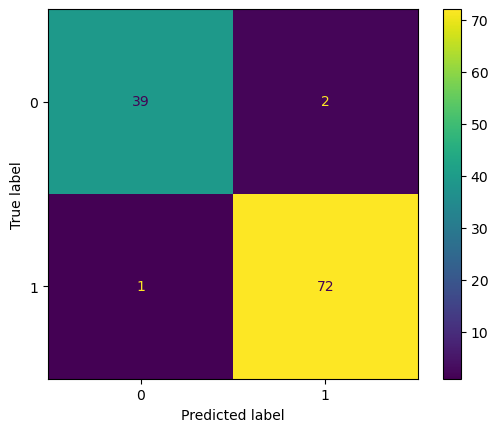

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cfm = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cfm.plot()
plt.show()

In [43]:
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test, y_pred) 
print(acc_rf)

0.9736842105263158


Using the RandomizedSearchCV

In [52]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": [3, 5], 
    "max_features": np.random.randint(1, 11, size = 1), 
    "min_samples_split": np.random.randint(2, 11, size = 1), 
    "bootstrap": [True, False], 
    "criterion": ["gini", "entropy"]} 
# build a classifier 
clf = RandomForestClassifier(n_estimators=50)
# Randomized search

random_search = RandomizedSearchCV(clf, param_distributions=param_dist, 
    n_iter=20, cv=10, random_state = 66) 
random_search.fit(X_train_ss, y_train)
print(random_search.best_params_)

/Users/bochenwang/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 5, 'max_features': 4, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}


In [53]:
y_pred_p = random_search.predict(X_test_ss)

In [54]:
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test, y_pred_p) 
print(acc_rf)

0.9649122807017544


[]

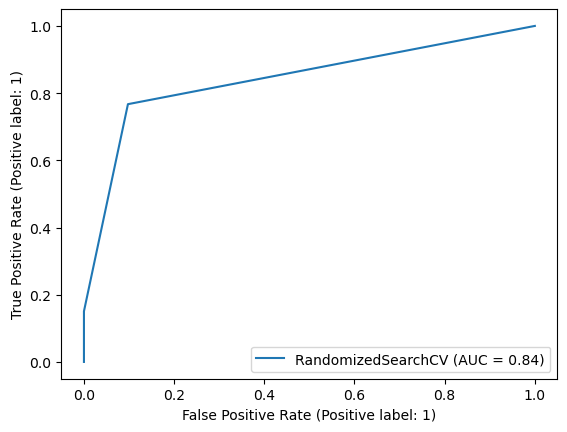

In [57]:
from sklearn import metrics
metrics.RocCurveDisplay.from_estimator(random_search, X_test, y_test)
plt.plot()